# Mini-Project Numerical Scientific Computing

- Understand the mathematical algorithm and how it can be programmed.
- Naive algorithm: Make a first implementation in Python using for-loops. You can use either lists or numpy arrays for data storage, but no vector operations.
- Numpy vectorized algorithm: Instead of looping over every element, use Numpy vectorized operations.

Inspiration taken from:
https://beej.us/blog/data/mandelbrot-set/, https://en.wikipedia.org/wiki/Mandelbrot_set


# Importing libraries


In [200]:
# Importing libraries
import matplotlib.pyplot as plt
from numba import jit
import numpy as np
import cv2 as cv
import timeit
import time

# Set the threshold to a high value to display all elements
np.set_printoptions(threshold=np.inf)

# Naive algorithm for computing Mandelbrot set


##### Naive Mandelbrot Algorithm


In [201]:
def NaiveMandelbrot(width, height, img, params):
    # Pseudocode from wikipedia: https://en.wikipedia.org/wiki/Mandelbrot_set
    min_real, max_real, min_imaginary, max_imaginary, max_iter = params

    # Iterate through each pixel coordinate
    # t1 = time.time()
    for Px in range(width):
        for Py in range(height):
            # Map pixel coordinates to real and imaginary parts of c
            c_Real = min_real + (max_real - min_real) * (Px / width)
            c_Imgy = min_imaginary + (max_imaginary - min_imaginary) * (Py / height)

            # Initialize z as 0
            z_Real = 0
            z_Imgy = 0

            # Initialize iterations
            iter = 0

            # Calculate the Mandelbrot iteration until the threshold
            # has been reached at 2 and iterations reach max iterations.
            # The threshold has been reached when the magnitude at each
            # calculation is <= to 2. (2*2) represent the squared threshold.
            while z_Real * z_Real + z_Imgy * z_Imgy <= (2 * 2) and iter < max_iter:
                # Calculate the next iteration of the real and imginary part of z
                next_z_Real = z_Real * z_Real - z_Imgy * z_Imgy + c_Real
                next_z_Imgy = 2 * z_Real * z_Imgy + c_Imgy

                # Assign the calculated parts to z as the new starting point
                z_Real = next_z_Real
                z_Imgy = next_z_Imgy

                # Increase iteration
                iter += 1

            # Checking if i(c) is in the Mandelbrot set
            if iter == max_iter:
                # In the Mandelbrot set
                img[Py, Px] = 255
            else:
                # Paint the pixel based on gradient color
                color = plt.cm.hot(iter / max_iter)
                img[Py, Px] = (color[0] * 255, color[1] * 255, color[2] * 255)
            print("Naive implementation c_Real:")
            print(c_Real)
            print("Naive implementation c_Imgy:")
            print(c_Imgy)
    # t2 = time.time()

    # print(f"\n- Naive Mandelbrot Algorithm -\nExecution time: {t2-t1}s")
    
    
    print(img)
    return img

# Optimizing the inner while loop


##### Optimized Mandelbrot Algorithm+


In [202]:
def NaiveMandelbrotOptimized(width, height, img, params):
    # Pseudocode from wikipedia: https://en.wikipedia.org/wiki/Plotting_algorithms_for_the_Mandelbrot_set
    min_real, max_real, min_imaginary, max_imaginary, max_iter = params

    # Iterate through each pixel coordinate
    # t1 = time.time()
    for Px in range(width):
        for Py in range(height):
            # Map pixel coordinates to real and imaginary parts of c
            c_Real = min_real + (max_real - min_real) * (Px / width)
            c_Imgy = min_imaginary + (max_imaginary - min_imaginary) * (Py / height)

            # Initialize z as 0 and introduce new variable w
            z_Real = 0
            z_Imgy = 0
            w = 0

            # Initialize iterations
            iter = 0

            # Calculate the Mandelbrot iteration until the threshold
            # Optimizing multiplication computations
            # from naive approach
            while z_Real + z_Imgy <= 4 and iter < max_iter:
                # Calculate the next iteration of the real and imginary part of z
                next_z_Real = z_Real - z_Imgy + c_Real
                next_z_Imgy = w - z_Real - z_Imgy + c_Imgy

                # Assign the calculated parts to z as the new starting point
                z_Real = next_z_Real * next_z_Real
                z_Imgy = next_z_Imgy * next_z_Imgy
                w = (next_z_Real + next_z_Imgy) * (next_z_Real + next_z_Imgy)

                # Increase iteration
                iter += 1

            # Checking if i(c) is in the Mandelbrot set
            if iter == max_iter:
                # In the Mandelbrot set
                img[Py, Px] = 255
            else:
                # Paint the pixel based on gradient color
                color = plt.cm.hot(iter / max_iter)
                img[Py, Px] = (color[0] * 255, color[1] * 255, color[2] * 255)
    # t2 = time.time()

    # print(f"\n- Optimized Naive Mandelbrot Algorithm+ -\nExecution time: {t2-t1}s")

    return img
    plt.imshow(img)

##### Further Optimized Mandelbrot Algorithm++


In [203]:
def NaiveMandelbrotOptimizedPlus(width, height, img, params):
    # Pseudocode from wikipedia: https://en.wikipedia.org/wiki/Plotting_algorithms_for_the_Mandelbrot_set
    min_real, max_real, min_imaginary, max_imaginary, max_iter = params

    # Iterate through each pixel coordinate
    # t1 = time.time()
    for Px in range(width):
        for Py in range(height):
            # Map pixel coordinates to real and imaginary parts of c
            c_Real = min_real + (max_real - min_real) * (Px / width)
            c_Imgy = min_imaginary + (max_imaginary - min_imaginary) * (Py / height)

            # Initialize z as 0
            z_Real = 0
            z_Imgy = 0

            next_z_Real = 0
            next_z_Imgy = 0

            # Initialize iterations
            iter = 0

            # Calculate the Mandelbrot iteration until the threshold
            # Optimizing multiplication computations
            # from naive approach
            while z_Real + z_Imgy <= 4 and iter < max_iter:
                # Calculate the next iteration of the real and imginary part of z
                next_z_Imgy = 2 * next_z_Real * next_z_Imgy + c_Imgy
                next_z_Real = z_Real - z_Imgy + c_Real

                # Assign the calculated parts to z as the new starting point
                z_Real = next_z_Real * next_z_Real
                z_Imgy = next_z_Imgy * next_z_Imgy

                # Increase iteration
                iter += 1

            # Checking if i(c) is in the Mandelbrot set
            if iter == max_iter:
                # In the Mandelbrot set
                img[Py, Px] = 255
            else:
                # Paint the pixel based on gradient color
                color = plt.cm.hot(iter / max_iter)
                img[Py, Px] = (color[0] * 255, color[1] * 255, color[2] * 255)
    # t2 = time.time()

    # print(f"\n- Optimized Naive Mandelbrot Algorithm++ -\nExecution time: {t2-t1}s")

    return img
    plt.imshow(img)

# Mandelbrot algorithm using Numpy vectorization


Performing vectorization on the naive Mandelbrot Algorithm implementation


In [204]:
def VectorizedMandelbrot(width, height, img, params):
    min_real, max_real, min_imaginary, max_imaginary, max_iter = params

    # Creating np arrays for width/height pixels
    Px = np.arange(width)
    Py = np.arange(height)

    # t1 = time.time()
    # Using np vectorization for mapping real and imaginary parts of c
    #c_Real = min_real + (max_real - min_real) * (Px / width)
    #c_Imgy = min_imaginary + (max_imaginary - min_imaginary) * (Py / height)
    
    c_Real, c_Imgy = np.meshgrid(min_real + (max_real - min_real) * (Px / width),
                                  min_imaginary + (max_imaginary - min_imaginary) * (Py / height))

    # Initialize z as 0
    z_Real = np.zeros_like(c_Real)
    z_Imgy = np.zeros_like(c_Imgy)

    # Initialize iterations
    iter = np.zeros_like(c_Real, dtype=int)

    for i in range(int(max_iter)):
        # As in the naive algorithm, we calculate the next iteration of the
        # real and imginary part of z, but now in a vectorized manner.
        next_z_Real = z_Real**2 - z_Imgy*2 + c_Real
        next_z_Imgy = 2 * z_Real* z_Imgy+ c_Imgy

        # Check the escape condition
        escaped = z_Real**2 + z_Imgy**2 <= 4
        #escaped = np.less_equal(z_Real**2 + z_Imgy**2,4)

        z_Real[escaped] = next_z_Real[escaped]
        z_Imgy[escaped] = next_z_Imgy[escaped]
        
        # Update iteration count for pixels
        iter[escaped] += 1

    #print(iter)

    ## Assigning colors based on escape status and iterations
    colors = plt.cm.hot(iter / max_iter)
    
    img[:, :, 0] = colors[:,:, 0] * 255
    img[:, :, 1] = colors[:,:, 1] * 255
    img[:, :, 2] = colors[:,:, 2] * 255

    """
    # Keep looping until the magnitude or iterations has reached threshold
    for i in range(max_iter):
        next_z_Real = z_Real**2 - z_Imgy**2 + c_Real
        next_z_Imgy = 2 * z_Real * z_Imgy + c_Imgy

        # Assign the calculated parts to z as the new starting point
        z_Real = next_z_Real
        z_Imgy = next_z_Imgy
        iter += 1

        # Update iteration count for pixels still in the set
        mask = (z_Real**2 + z_Imgy**2) <= 4
        iter[mask] = iter
        z_Real[mask] = 0
        z_Imgy[mask] = 0

    # Normalize the iterations and map the color
    normalized_iter = iter / max_iter
    color = plt.cm.hot(normalized_iter)

    # Paint the pixel based on the color
    img[Py, Px] = (color[0] * 255, color[1] * 255, color[2] * 255)
    """
    ##t2 = time.time()

    # print(f"\n- Vectorized Mandelbrot Algorithm -\nExecution time: {t2-t1}s")
    
   
    print("Vectorized implementation c_Real:")
    print(c_Real)
    
    print("Vectorized implementation c_Imgy:")
    print(c_Imgy)

    print(img)
    return img

# Naive Mandelbrot Algorithm using Numba jit


In [205]:
@jit(nopython=True, fastmath=True, cache=True)
def NaiveMandelbrotNumba(width, height, img, params):
    # Pseudocode from wikipedia: https://en.wikipedia.org/wiki/Mandelbrot_set
    min_real, max_real, min_imaginary, max_imaginary, max_iter = params

    # Iterate through each pixel coordinate
    # t1 = time.time()
    for Px in range(width):
        for Py in range(height):
            # Map pixel coordinates to real and imaginary parts of c
            c_Real = min_real + (max_real - min_real) * (Px / width)
            c_Imgy = min_imaginary + (max_imaginary - min_imaginary) * (Py / height)

            # Initialize z as 0
            z_Real = 0
            z_Imgy = 0

            # Initialize iterations
            iter = 0

            # Calculate the Mandelbrot iteration until the threshold
            # has been reached at 2 and iterations reach max iterations.
            # The threshold has been reached when the magnitude at each
            # calculation is <= to 2. (2*2) represent the squared threshold.
            while z_Real * z_Real + z_Imgy * z_Imgy <= (2 * 2) and iter < max_iter:
                # Calculate the next iteration of the real and imginary part of z
                next_z_Real = z_Real * z_Real - z_Imgy * z_Imgy + c_Real
                next_z_Imgy = 2 * z_Real * z_Imgy + c_Imgy

                # Assign the calculated parts to z as the new starting point
                z_Real = next_z_Real
                z_Imgy = next_z_Imgy

                # Increase iteration
                iter += 1

            # Checking if i(c) is in the Mandelbrot set
            if iter == max_iter:
                # In the Mandelbrot set
                img[Py, Px] = 255
            else:
                # Paint the pixel based on simple color mapping
                i = iter / max_iter
                r = int(255 * (1 - i))
                g = int(255 * (1 - 0.5 * i))
                b = int(255 * (1 - 0.75 * i))
                img[Py, Px] = (r * 255, g * 255, b * 255)
    # t2 = time.time()

    # print(f"\n- Naive Mandelbrot Algorithm -\nExecution time: {t2-t1}s")

    return img

# Displaying the Mandelbrot set in the complex plane


##### Function to display Mandelbrot


In [206]:
def displayMandelbrot(img, params, title):
    min_real = params[0]
    max_real = params[1]
    min_imaginary = params[2]
    max_imaginary = params[3]

    plt.imshow(img, extent=(min_real, max_real, min_imaginary, max_imaginary))
    plt.xlabel("Real(c)")
    plt.ylabel("Imaginary(c)")
    plt.title("Mandelbrot Set\n- " + f"{title}")
    plt.show()

# Defining image and complex variables


In [207]:
# Defining variables for the img
width = 5
height = 5
channel = 3
img = np.zeros((height, width, 3), dtype=np.uint8)

# Defining max iterations
max_iter = 100.0

# Defining threshold
T = 2

# Defining the range of values for
# the real and imaginary parts of c
min_real = -2.0
max_real = 1.0
min_imaginary = -1.5
max_imaginary = 1.5
params = [min_real, max_real, min_imaginary, max_imaginary, max_iter]

# Running each algorithm


Naive implementation c_Real:
-2.0
Naive implementation c_Imgy:
-1.5
Naive implementation c_Real:
-2.0
Naive implementation c_Imgy:
-0.8999999999999999
Naive implementation c_Real:
-2.0
Naive implementation c_Imgy:
-0.2999999999999998
Naive implementation c_Real:
-2.0
Naive implementation c_Imgy:
0.2999999999999998
Naive implementation c_Real:
-2.0
Naive implementation c_Imgy:
0.9000000000000004
Naive implementation c_Real:
-1.4
Naive implementation c_Imgy:
-1.5
Naive implementation c_Real:
-1.4
Naive implementation c_Imgy:
-0.8999999999999999
Naive implementation c_Real:
-1.4
Naive implementation c_Imgy:
-0.2999999999999998
Naive implementation c_Real:
-1.4
Naive implementation c_Imgy:
0.2999999999999998
Naive implementation c_Real:
-1.4
Naive implementation c_Imgy:
0.9000000000000004
Naive implementation c_Real:
-0.7999999999999998
Naive implementation c_Imgy:
-1.5
Naive implementation c_Real:
-0.7999999999999998
Naive implementation c_Imgy:
-0.8999999999999999
Naive implementation c_

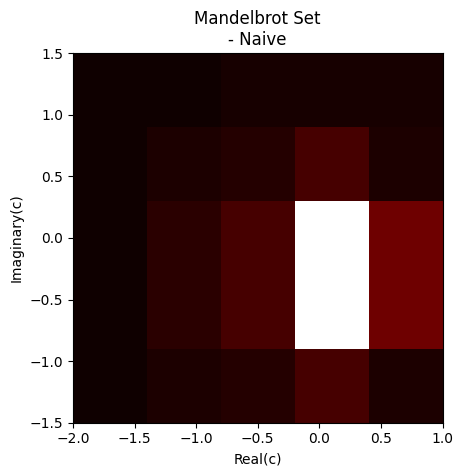

Vectorized implementation c_Real:
[[-2.  -1.4 -0.8 -0.2  0.4]
 [-2.  -1.4 -0.8 -0.2  0.4]
 [-2.  -1.4 -0.8 -0.2  0.4]
 [-2.  -1.4 -0.8 -0.2  0.4]
 [-2.  -1.4 -0.8 -0.2  0.4]]
Vectorized implementation c_Imgy:
[[-1.5 -1.5 -1.5 -1.5 -1.5]
 [-0.9 -0.9 -0.9 -0.9 -0.9]
 [-0.3 -0.3 -0.3 -0.3 -0.3]
 [ 0.3  0.3  0.3  0.3  0.3]
 [ 0.9  0.9  0.9  0.9  0.9]]
[[[ 15   0   0]
  [ 15   0   0]
  [ 23   0   0]
  [ 23   0   0]
  [ 23   0   0]]

 [[ 15   0   0]
  [ 23   0   0]
  [ 42   0   0]
  [ 28   0   0]
  [ 23   0   0]]

 [[ 15   0   0]
  [ 36   0   0]
  [255 255 255]
  [ 42   0   0]
  [ 28   0   0]]

 [[ 15   0   0]
  [ 42   0   0]
  [ 42   0   0]
  [115   0   0]
  [ 76   0   0]]

 [[ 15   0   0]
  [ 23   0   0]
  [ 23   0   0]
  [ 23   0   0]
  [ 23   0   0]]]
0.00247955322265625


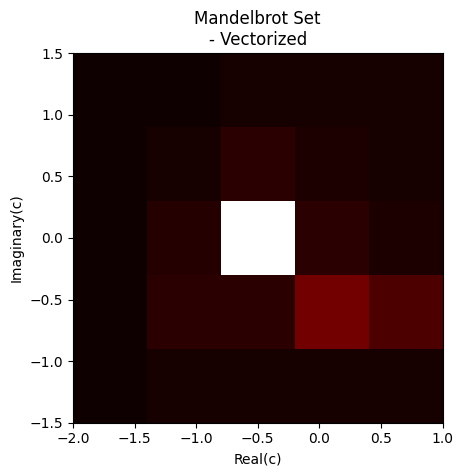

In [208]:
# Naive Mandelbrot Algorithm
t1 = time.time()
img_mandel = NaiveMandelbrot(width, height, img, params)
t2 = time.time()
print(f"\n- Naive Mandelbrot Algorithm -\nExecution time: {t2-t1}s")
displayMandelbrot(img_mandel, params, "Naive")


# Optimized Mandelbrot Algorithm+
# t1 = time.time()
# img_mandel = NaiveMandelbrotOptimized(width, height, img, params)
# t2 = time.time()
# print(f"\n- Optimized Naive Mandelbrot Algorithm+ -\nExecution time: {t2-t1}s")
# displayMandelbrot(img_mandel, params, "Naive Optimized+")

# Optimized Mandelbrot Algorithm++
# t1 = time.time()
# img_mandel = NaiveMandelbrotOptimizedPlus(width, height, img, params)
# t2 = time.time()
# print(f"\n- Optimized Naive Mandelbrot Algorithm++ -\nExecution time: {t2-t1}s")
# displayMandelbrot(img_mandel, params, "Naive optimized++")

# Vectorized Mandelbrot Algorithm
t1 = time.time()
img_mandel2 = VectorizedMandelbrot(width, height, img, params)
print(time.time() - t1)
displayMandelbrot(img_mandel2, params, "Vectorized")

# Numba jit Optimized Mandelbrot Algorithm
# t1 = time.time()
# img_mandel = NaiveMandelbrotNumba(width, height, img, params)
# t2 = time.time()
# print(f"\n- Naive Mandelbrot Algorithm Numba -\nExecution time: {t2-t1}s")
# displayMandelbrot(img_mandel, params, "Naive")

In [209]:
"""
# Number of runs
runs = 1

# Naive Mandelbrot Algorithm
avg_time = timeit.timeit(lambda:NaiveMandelbrot(width, height, img, params), number = runs) / runs
print(f"Naive Algorithm - Avg Execution Time: {avg_time}")

# Optimized Mandelbrot Algorithm+
avg_time = timeit.timeit(lambda:NaiveMandelbrotOptimized(width, height, img, params), number = runs) / runs
print(f"Optimized+ Algorithm - Avg Execution Time: {avg_time}")

# Optimized Mandelbrot Algorithm++
avg_time = timeit.timeit(lambda:NaiveMandelbrotOptimizedPlus(width, height, img, params), number = runs) / runs
print(f"Optimized++ Algorithm - Avg Execution Time: {avg_time}")
"""

'\n# Number of runs\nruns = 1\n\n# Naive Mandelbrot Algorithm\navg_time = timeit.timeit(lambda:NaiveMandelbrot(width, height, img, params), number = runs) / runs\nprint(f"Naive Algorithm - Avg Execution Time: {avg_time}")\n\n# Optimized Mandelbrot Algorithm+\navg_time = timeit.timeit(lambda:NaiveMandelbrotOptimized(width, height, img, params), number = runs) / runs\nprint(f"Optimized+ Algorithm - Avg Execution Time: {avg_time}")\n\n# Optimized Mandelbrot Algorithm++\navg_time = timeit.timeit(lambda:NaiveMandelbrotOptimizedPlus(width, height, img, params), number = runs) / runs\nprint(f"Optimized++ Algorithm - Avg Execution Time: {avg_time}")\n'